## 데이터 분석기초반
- 데이터프레임에 대한 이해가 완벽해야 한다.
- df
- 2차원 / 2차원리스트 

In [1]:
a = [[1,2],[4,5],[5,6]]

In [2]:
a

[[1, 2], [4, 5], [5, 6]]

In [3]:
#2차원 리스트의 요소를 접근하기 위해서 index를 기준으로 접근
a[0][0] #2차원

1

- x,y 좌표평면 2차원
- 데이터프레임은 행과 열로 행은 index, 열은 컬럼 column 
- 데이터 분석 전처리에 판다스는 필수, numpy 기본

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame({'이름':['홍길동','김영희','김철수'],
                  '성적':['A','B','A'],
                  '점수':[10,20,30]})

In [6]:
df

,이름,성적,점수
0,홍길동,A,10
1,김영희,B,20
2,김철수,A,30


- 2차원라는 형태
- 컬럼, 열, 이름, 성적, 점수
- 0,1, 2 index의 개념은 열 

- 데이터프레임은 행과 열로 이루어졌고, 데이터프레임을 추출하거나 조작할 때는 행과 열로 접근해야 한다!

- 성적만 추출하고 싶어요!

In [7]:
df['성적'] #성적만 가지고 온다. #시리즈형태로 바뀐다.
#시리즈 형태로 다양한 연산이 가능하고, numpy 에서도 제공하는 것을 이용할 수 있다.
#연산하기 가장 좋은 형태 판다스 제공한다. 

0    A
1    B
2    A
Name: 성적, dtype: object

- 성적과 이름을 추출해줘!

In [8]:
df[['이름','성적']] #열을 기준으로 추출하는 것  컬럼을 기준으로 추출

,이름,성적
0,홍길동,A
1,김영희,B
2,김철수,A


In [9]:
df[['이름','점수']]

,이름,점수
0,홍길동,10
1,김영희,20
2,김철수,30


- 인덱스를 기준으로 추출 할 수 있다.

In [10]:
df['점수'].sum()

60

In [12]:
df['점수'].sum()

60

In [13]:
df[['이름','점수']].sum()

이름    홍길동김영희김철수
점수           60
dtype: object

In [14]:
df.sum()

이름    홍길동김영희김철수
성적          ABA
점수           60
dtype: object

- mpg데이터로 살펴보기!

In [15]:
mpg = pd.read_csv('mpg.csv')

In [17]:
mpg['manufacturer']

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [19]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')

In [24]:
mpg_sp= mpg[['manufacturer', 'model', 'hwy']]

### 컬럼을 기준으로 데이터를 추출했는데 
- model, hwy 는 데이터 타입이 다르다.

In [23]:
#데이터타입을 보는 방법
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [25]:
mpg_sp

,manufacturer,model,hwy
0,audi,a4,29
1,audi,a4,29
2,audi,a4,31
3,audi,a4,30
4,audi,a4,26
...,...,...,...
229,volkswagen,passat,28
230,volkswagen,passat,29
231,volkswagen,passat,26
232,volkswagen,passat,26


- object는 어떤 식으로 접근해야 할까?
- 문자열 데이터를 숫자로 변경해야 한다. 
- object 맞게 기술통계를 해야 한다.
- 1. 빈도 , 2. 라벨링(인코딩)

In [30]:
# 아우디 차량은 몇 개가 있어? 
mpg_sp['manufacturer'].value_counts()#값의 개수를 세는 것

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [31]:
mpg_mc= mpg_sp['manufacturer'].value_counts()#값의 개수를 세는 것

In [34]:
mpg_mc= mpg_mc.to_frame()

In [35]:
mpg_mc

,manufacturer
dodge,37
toyota,34
volkswagen,27
ford,25
chevrolet,19
audi,18
hyundai,14
subaru,14
nissan,13
honda,9


In [36]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [39]:
sum(mpg['cty']/len(mpg)) #데이터프레임에서 값을 추출하여 1차원으로 변경하면 계산 편하게 할 수 있다!

16.858974358974322

In [41]:
mpg.head(30) #앞의 데이터 살펴보는 것

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [42]:
mpg.tail() #뒤의 데이터 살펴보는 것

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [43]:
mpg.shape #행과 열 234 행과 11개 컬럼 

(234, 11)

In [49]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [44]:
mpg.describe() #요약통계치 제공 #수치형 데이터만 존재한다.

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


- describe 데이터 대한 분포, 이상치 
- how to 
- 데이터 분석기초반 전체 성적이 모두 50점 평균은 50점 / 데이터 분석기초반 전체 중 반은 0점 반은 100점이면 평균 50점/
- 평균의 함정을 빠지지 않기 위해 산포도를 볼 수 있는 분산, 표준편차
- 분산 표준편차는 평균에 기반으로 
- 사분위수 25 50 75 % IQR 중앙값을 기준으로 한다. 
- 평균의 함정에 빠지지 않게 요약 통계를 보고 데이터의 개괄적인 분포를 이해한다.

- 데이터 분포를 왜 볼까?
- 이상치를 왜 봐야 하나?

- 회귀분석, 분류, 머신러닝, 딥러닝, 통계분석 등등
- 정규분포를 가정하고 진행한다. 

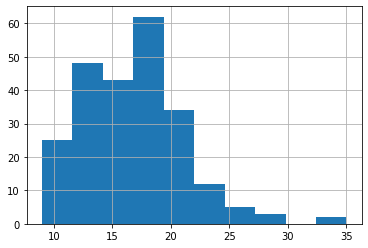

In [47]:
mpg['cty'].hist()

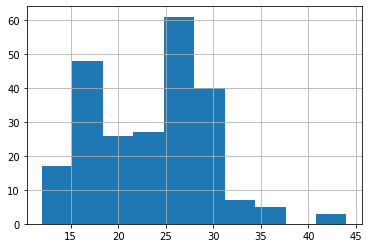

In [48]:
mpg['hwy'].hist()

In [50]:
mpg_sp

,manufacturer,model,hwy
0,audi,a4,29
1,audi,a4,29
2,audi,a4,31
3,audi,a4,30
4,audi,a4,26
...,...,...,...
229,volkswagen,passat,28
230,volkswagen,passat,29
231,volkswagen,passat,26
232,volkswagen,passat,26


In [51]:
mpg_mc.describe() 

,manufacturer
count,15.000000
mean,15.600000
std,10.972693
min,3.000000
25%,6.500000
50%,14.000000
75%,22.000000
max,37.000000


In [53]:
#cty, hwy 더하고 싶다.
mpg['tot'] = mpg['cty'] + mpg['hwy']

In [54]:
mpg #파생변수로 만들수 있다 tot.

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,tot
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,50
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,42
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,44


In [55]:
import numpy as np

In [57]:
mpg['test']=np.where(mpg['tot'] >40,'good','bad')

In [61]:
mpg.test.value_counts()

good    123
bad     111
Name: test, dtype: int64

In [63]:
test_ct =mpg['test'].value_counts()

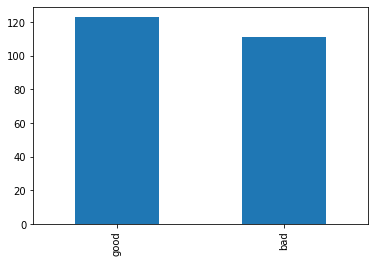

In [65]:
test_ct.plot.bar()

## 필수과제 1
- mpg 데이터를 가지고 간단한 전처리를 진행해 주세요.
- 데이터를 추출할 질문을 정하고 -> 코드를 작성하고 -> 주석을 작성하고 -> 결론을 도출!
- ex) 아우디의 차량의 개수와, 아우디 차량의 고속도로 연비는? ( 먼저 데이터를 보고 본인이 질문을 하고 그걸 코드로 작성)
- 질문은 최소 5개 
- 구글링을 해도 좋습니다. 데이터프레임 전처리, 위에 적은 문법 내용을 구글링하면 기본적으로 다 나올 것 
- 과제 노션에 제출할 수 없으니 노션 권한이 부여 받은 후 최소 2일 안에 
- 과제 기한 ex) 다음 주 일요일 권한 부여되면 화요일 오후 11시 59분 안까지 과제 제출
- 노션 권한 8일 예정 10일까지 진행해 주시면 됩니다!!